# <font color ="coral"> Task  : Survey<br>
   <font color ="orange">Author : Hemant Goyal<br>
   <font color ="lightsalmon">E-mail : ghemant4@gmail.com

In [ ]:
# Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Que-1 :<font color="green"> Load the Dataset named survey

In [106]:
survey = pd.read_excel(r"C:\Users\user\Downloads\Dhruv Research\survey.xlsx")

In [107]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [108]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

# Que - 2 : <font color = "green">How many Samples has collected on each days?

In [109]:
survey["collection_date"].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

# Que - 3 :<font color = "green">  What proportion of the total respondents were aged less than 45?

In [110]:
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, '24ko', 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67,
       65, 71, 63, 64, 68, 69, 99, 72, 75, 76], dtype=object)

In [111]:
index_names = survey[ survey['age'] == '24ko' ].index
index_names

Int64Index([123], dtype='int64')

In [112]:
survey.drop(index_names, inplace = True)

In [113]:
survey.shape

(6866, 14)

In [114]:
survey_2 = survey.copy()
proportion = len(survey_2[survey_2['age'] < 45]) *100/ len(survey)
print(" total respondents were aged less than 45 : {}%".format(round(proportion,2))) 

 total respondents were aged less than 45 : 93.18%


# Insights : <font color = green> 93.18% of the data is below age<45.

In [115]:
survey_3 = pd.DataFrame(survey_2.groupby(["age"])["response_id"].nunique())
survey_3["age_count %"] = round(survey_3["response_id"]*100/len(survey),2)
survey_3.head()

,response_id,age_count %
age,,
18,125,1.82
19,171,2.49
20,328,4.78
21,311,4.53
22,392,5.71


# Que - 4 : <font color = "green"> How to add a new column age_group with it's value?

In [116]:
r1=list(range(18,26))
dict1=dict.fromkeys(r1,'18-25')
r2=list(range(25,41))
dict2=dict.fromkeys(r2,'25-40')
r3=list(range(40,56))
dict3=dict.fromkeys(r3,'40-55')
r4=list(range(56,150))
dict4=dict.fromkeys(r4,'55+')
dict1.update(dict2)
dict1.update(dict3)
dict1.update(dict4)

In [117]:
survey['age_group']=survey['age'].map(dict1)
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


# Que-5 : <font color ="green"> Total samples with age_group and highest Samples?

In [118]:
survey_4= pd.DataFrame(survey.groupby(["age_group"])["response_id"].nunique())
survey_4.head()

,response_id
age_group,
18-25,2093
25-40,3844
40-55,821
55+,108


In [119]:
survey_5= survey_4.rename(columns={"response_id":"Counts of Samples"})
survey_5 = survey_5.sort_values("Counts of Samples",ascending=False)
survey_5

,Counts of Samples
age_group,
25-40,3844
18-25,2093
40-55,821
55+,108


In [120]:
print("age_group (25-40) has highest Samples :",survey_5["Counts of Samples"].max())

age_group (25-40) has highest Samples : 3844


# Que-6 :  <font color = "green"> Proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote?

In [121]:
RJD =(len(survey[(survey["Vote_Now"] =="RJD") & (survey["Past_Vote"] =="RJD")])/len(survey))*100
print( "Respondents had opted for the RJD : {}%".format(round(RJD,2)))

Respondents had opted for the RJD : 11.81%


# Que-7 : <font color =" green"> For each day of collection Determine the proportion of respondents who were fully satisfied with the performance of the CM. 

In [122]:
survey_6 = survey.copy()
cm = round(survey_6.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100),2)
cm

,CM_satisfaction
collection_date,
2020-08-24,9.81
2020-08-25,9.52
2020-08-26,9.87
2020-08-27,8.12
2020-08-28,12.09
2020-08-29,11.77
2020-08-30,11.17
2020-08-31,11.13
2020-09-01,12.36


# Que-8 : <font color = "green"> Day-wise proportion of respondents that opted fully dissatisfied with their MLA.

In [123]:
survey_7 = survey.copy()
mla = round(survey_7.groupby(['collection_date'])[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100),2)
mla


,MLA_satisfaction
collection_date,
2020-08-24,60.01
2020-08-25,63.13
2020-08-26,59.03
2020-08-27,60.60
2020-08-28,60.71
2020-08-29,56.45
2020-08-30,62.03
2020-08-31,57.63
2020-09-01,63.43


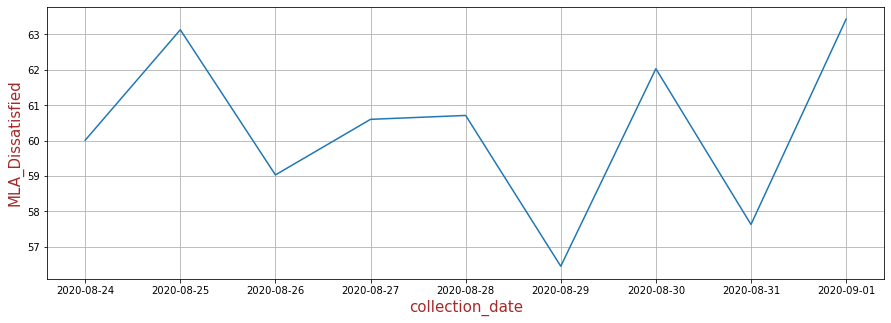

In [124]:
plt.figure(figsize=(15,5))
plt.plot(mla.index,"MLA_satisfaction",data = mla)
plt.xlabel("collection_date", fontsize=15,color="brown")
plt.ylabel("MLA_Dissatisfied", fontsize=15,color="brown")
plt.grid()

# Que-9 : <font color = "green"> Pivot-table with  index as Past_Vote, Column as Vote_Now and cell values as the count of samples.


In [125]:
table = pd.pivot_table(survey, index='Past_Vote', columns ='Vote_Now', aggfunc='count', values = 'response_id')
table

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


# Que-10 : <font color = "green"> Pivot table with  index as Past_Vote, Column as Vote_Now and the cell values as the sum of “weight”.

In [126]:
table_1 = pd.pivot_table(survey, index='Past_Vote', columns ='Vote_Now', aggfunc='sum', values = 'weight')
table_1

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


# Que-11 : <font color = "green"> Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [127]:
survey_8= survey_4.rename(columns={"response_id":"Counts of Samples"})
survey_8

,Counts of Samples
age_group,
18-25,2093
25-40,3844
40-55,821
55+,108


# Que-12 :  <font color = "green">Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.


In [128]:
survey_9 = survey.copy()
survey_9= pd.DataFrame(survey_9.groupby(["age_group"])["Vote_Now"].apply(lambda x:np.sum(x=="JD(U)")))
survey_9

,Vote_Now
age_group,
18-25,180
25-40,264
40-55,71
55+,10


# Que-13 : <font color = "green">Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [130]:
survey_10 = pd.concat([survey_9, survey_8], axis=1)
survey_10

,Vote_Now,Counts of Samples
age_group,,
18-25,180,2093
25-40,264,3844
40-55,71,821
55+,10,108
